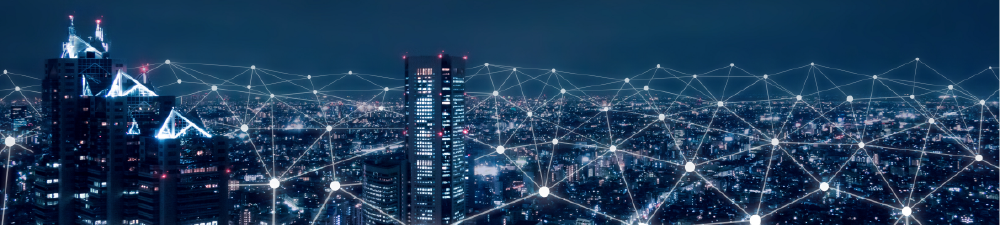

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
#user_df=pd.read_csv('Mini_project_2_Data.xls',sep=',', encoding='latin-1')
user_df=pd.read_csv('Mini_project_2_Data.csv')

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

In [3]:
# Counting the number of players in each AB group.

count = user_df.groupby('version').count()
count

userid  sum_gamerounds  retention_1  retention_7
version                                                  
gate_30   44700           44700        44700        44700
gate_40   45489           45489        45489        45489

## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [4]:
#Check for any missing values in the data using isnull() function

user_df.head(5).isnull().values.any()

False

In [5]:
user_df.head(5).isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
user_df.head(5).isnull().sum().sum()

0

In [7]:
# creating bool series True for NaN values
bool_series = pd.isnull(user_df["userid"])

# filtering data
# displayind data only with team = NaN
user_df[bool_series]

Empty DataFrame
Columns: [userid, version, sum_gamerounds, retention_1, retention_7]
Index: []

There is no missing value.

### Q1.2 Identify outliers

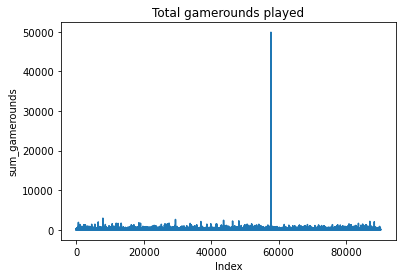

In [8]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds);

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

user_df[user_df['sum_gamerounds']==user_df['sum_gamerounds'].max()]

df=user_df[user_df['sum_gamerounds']<10000]
df

userid  version  sum_gamerounds  retention_1  retention_7
57702  6390605  gate_30           49854        False         True

userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3        False        False
1          337  gate_30              38         True        False
2          377  gate_40             165         True        False
3          483  gate_40               1        False        False
4          488  gate_40             179         True         True
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30        False        False
90186  9999710  gate_30              28         True        False
90187  9999768  gate_40              51         True        False
90188  9999861  gate_40              16        False        False

[90188 rows x 5 columns]

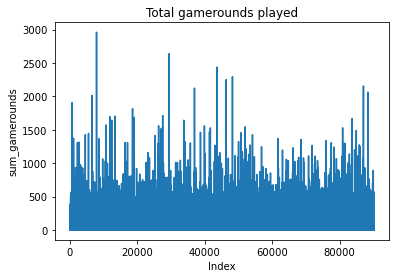

In [10]:
#Plot the graph for sum_gamerounds player after removing the outlier

#Check for outlier values in sum_gamerounds column

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df.sum_gamerounds);


In [11]:
# Summary Stats: sum_gamerounds
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

count       mean         std  min   1%   5%  10%  20%   50%  \
sum_gamerounds  90188.0  51.320253  102.682719  0.0  0.0  1.0  1.0  3.0  16.0   

                 80%    90%    95%    99%     max  
sum_gamerounds  67.0  134.0  221.0  493.0  2961.0

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [12]:
#Insert calculation for 7-day retention rate

retention_7 = 100 * sum(df["retention_7"])/df["retention_7"].count() 
print("Overall 7-day retention rate is %.2f%% users" % retention_7)


Overall 7-day retention rate is 18.61% users


### Q2.2 How many players never played the game after installing? 

In [13]:
# Find number of customers with sum_gamerounds is equal to zero
df[df["sum_gamerounds"]==0]['userid'].count()

3994

3994 users did not play the game after installing.

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [14]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds

df.groupby("sum_gamerounds").userid.count().reset_index().sort_values(by="userid",ascending=False).rename(columns={'userid':'userid_count'})


sum_gamerounds  userid_count
1                 1          5538
2                 2          4606
0                 0          3994
3                 3          3958
4                 4          3629
..              ...           ...
770             827             1
771             828             1
772             829             1
773             830             1
940            2961             1

[941 rows x 2 columns]

In [15]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
df2=df.groupby("sum_gamerounds").userid.count().reset_index().sort_values(by="sum_gamerounds").rename(columns={'userid':'userid_count'})
df_200=df2[(lambda x: df2["sum_gamerounds"] <=200)]
df_200

sum_gamerounds  userid_count
0                 0          3994
1                 1          5538
2                 2          4606
3                 3          3958
4                 4          3629
..              ...           ...
196             196            46
197             197            39
198             198            37
199             199            46
200             200            49

[201 rows x 2 columns]

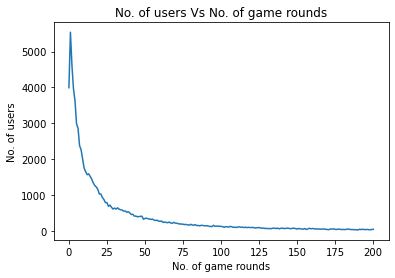

In [16]:
#Use plot() function on the summarized stats to visualize the chart

plt.xlabel('No. of game rounds')
plt.ylabel('No. of users')
plt.title("No. of users Vs No. of game rounds")
plt.plot(df_200["sum_gamerounds"],df_200["userid_count"])
plt.show();

The number of users decreases as the levels progress. (0 game round means users didn't play.)

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [17]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(df.version, df.retention_7).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(df.version, df.retention_1).apply(lambda r: r/r.sum(), axis=1)

retention_7     False     True 
version                        
gate_30      0.809817  0.190183
gate_40      0.818000  0.182000

retention_1     False     True 
version                        
gate_30      0.551802  0.448198
gate_40      0.557717  0.442283

In [18]:
df.groupby("version").agg({"userid":"count","retention_1":"mean","retention_7":"mean","sum_gamerounds":"sum"}, inplace = True).rename(columns={'userid':'userid_count'})

userid_count  retention_1  retention_7  sum_gamerounds
version                                                        
gate_30         44699     0.448198     0.190183         2294941
gate_40         45489     0.442283     0.182000         2333530

<mark>__Analysis Results:__
    
There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control group when it was at level 30 (44.8%).

Again,a decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control group when it was at level 30 (19.0%).

It's a small change, but even small changes in retention can have a large impact. However, total game rounds played is higher fro when the gate was moved to level 40 (2.33mil) compared to the control group when it was at level 30 (2.29mil)

### Q3.2 Gamerounds summary for different game versions

In [19]:
#use pandas group by to calculate average game rounds played summarized by different versions

df[["version","sum_gamerounds"]].groupby("version").agg("mean")

sum_gamerounds
version                
gate_30       51.342111
gate_40       51.298776

<mark>__Analysis Results:__
    
Total number of gamerounds played in total by each player differ only very slightly based on different versions of the game. 
    
Average game rounds played when gate is at level 30 (51.34) is slightly higher than when gate is at level 40 (51.30).

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [20]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

userid version  sum_gamerounds  retention_1  retention_7
0     116       A               3        False        False
1     337       A              38         True        False
2     377       B             165         True        False
3     483       B               1        False        False
4     488       B             179         True         True

In [21]:
groupA=pd.DataFrame(df[df.version=="A"]['sum_gamerounds'])
groupB=pd.DataFrame(df[df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [22]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    
from scipy.stats import shapiro
import scipy.stats as stats

# PW: If the p-value of Shapiro-Wilk Test is greater than 0.05, the data is normal.

#check for groupA, groupB
print(groupA, groupB)

       sum_gamerounds
0                   3
1                  38
6                   0
11                  0
13                 39
...               ...
90179              14
90180               7
90182              21
90183              10
90186              28

[44699 rows x 1 columns]        sum_gamerounds
2                 165
3                   1
4                 179
5                 187
7                   2
...               ...
90181              10
90184              97
90185              30
90187              51
90188              16

[45489 rows x 1 columns]


In [23]:
stat, p = shapiro(groupA['sum_gamerounds'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Group A has a normal distribution')
else:
    print('Group A does not have a normal distribution')

stat=0.489, p=0.000
Group A does not have a normal distribution


In [24]:
stat, p = shapiro(groupB['sum_gamerounds'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Group B has a normal distribution')
else:
    print('Group B does not have a normal distribution')

stat=0.483, p=0.000
Group B does not have a normal distribution


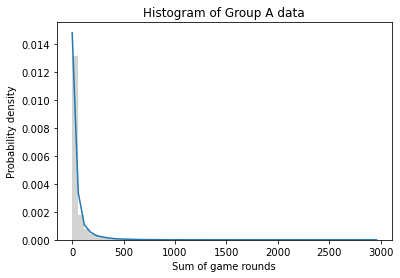

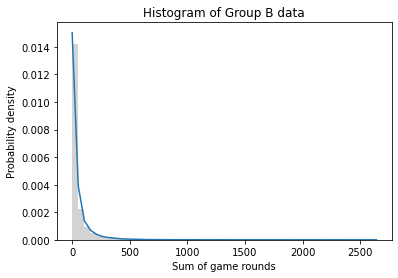

In [25]:
'''plot histograms for Group A & Group B'''
plt.title('Histogram of Group A data')
density = stats.gaussian_kde(groupA['sum_gamerounds'])
n, x, _ = plt.hist(groupA['sum_gamerounds'], color='lightgrey', density=True, bins=50)  
plt.plot(x, density(x))
plt.ylabel("Probability density")
plt.xlabel("Sum of game rounds")
plt.show();


plt.title('Histogram of Group B data')
density = stats.gaussian_kde(groupB['sum_gamerounds'])
n, x, _ = plt.hist(groupB['sum_gamerounds'], color='lightgrey', density=True, bins=50)  
plt.plot(x, density(x))
plt.ylabel("Probability density")
plt.xlabel("Sum of game rounds")
plt.show();

<mark>__Analysis Results:__
    
Based on the result generated for shapiro test of normality, the p-value for the two groups is smaller than 0.05. We can reject null hypothesis and the data distribution are not normal.
    
From the histogram plot above, no bell curve shaped is observed and hence data for both groups are not normally distrubuted.

### Q4.2 Test of homegienity of variance

In [26]:
#---------------------- Levene's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

# PW: Levene's test is used to check that variances are equal for all samples when your data comes from a non normal distribution

#perform levene's test and accept or reject the null hypothesis based on the results

# Define A/B groups
# Parametric Test
# Assumption: Homogeneity of variances

print(stats.levene(groupA['sum_gamerounds'], groupB['sum_gamerounds'])) 

leveneTest = stats.levene(groupA['sum_gamerounds'], groupB['sum_gamerounds'])[1] < 0.05
# H0: Homogeneity: False
# H1: Heterogeneous: True
        
print(leveneTest)
print(stats.mannwhitneyu(groupA, groupB)[1])

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)
False
0.02544577639572688


<mark>__Analysis Results:__

Since p-value is 0.784 (>0.05), we fail to reject the null hypothesis. We conclude that A & B groups have equal variances. 
    
Levene's test is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance. The Levene test can be used to verify that assumption. We can therefore conclude that A & B groups have equal variances. The attributes of user in Group A & B are similar and the test is fair. 
    
As we conclude that A & B groups have equal variances, and samples from the 2 groups are independent, we suggest to use the two sample t test assuming equal variances to ascertain if the null hypothesis (means of the two groups are equal) can be accepted or rejected, and we assume normality of the datas using the central limit theorem by taking a large enough number of samples (>30) and proving normality before running the t test.

### Q4.3 Test of significance: Two sample test

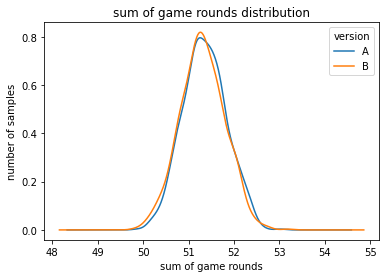

In [27]:
# Creating a list with bootstrapped means for each AB-group of 1000 samples
boot_gamerounds = []
for i in range(1000):
    boot_mean_gamerounds = df.sample(frac=1,replace=True).groupby("version").sum_gamerounds.mean()
    boot_gamerounds.append(boot_mean_gamerounds)
    
# Transforming the list to a DataFrame
boot_gamerounds = pd.DataFrame(boot_gamerounds)

# A KDE plot of the 1d bootstrap distributions
sum_of_gamerounds = boot_gamerounds.plot.kde();
sum_of_gamerounds.set_xlabel("sum of game rounds");
sum_of_gamerounds.set_ylabel("number of samples");
sum_of_gamerounds.set_title("sum of game rounds distribution");

In [28]:
stat1, p1 = shapiro(boot_gamerounds['A'])
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
    print('Group A has a normal distribution')
else:
    print('Group A does not have a normal distribution')

stat2, p2 = shapiro(boot_gamerounds['B'])
print('stat=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05:
    print('Group B has a normal distribution')
else:
    print('Group B does not have a normal distribution')

stat=0.998, p=0.324
Group A has a normal distribution
stat=0.999, p=0.844
Group B has a normal distribution


In [29]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal (i.e. the average sum of game rounds played for version A and B are the same)
# ALTERNATE Hypothesis H1: Two samples are different (i.e. the average sum of game rounds played for version A and B are not the same)

#Apply relevant two sample test to accept or reject the NULL hypothesis

from scipy.stats import ttest_ind

t_1, pvalue_1 = stats.ttest_ind(groupA['boot_gamerounds'],groupB['boot_gamerounds'])
print('t_1 = %.3f, p_1 value = %f'%(t_1, pvalue_1))

KeyError: 'boot_gamerounds'

<mark>__Analysis Results:__
    
As p-value is 0.949 > 0.05, we do not reject the null hypothesis, that the average sum of game rounds played for version A and B are the same.
    
For groups A and B, based on the results, groups A and B are not statistically different in terms of the sum of game rounds played.  
We recommend that there is no need to move the gate from Level 30 to Level 40 if the company wants to increase the sum of game rounds, as there is no significant difference in the average sum of game rounds played for version A and B.
    

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
df.groupby("version").mean()[['retention_1','retention_7']]

#Analyze the number of game rounds played for two different groups using group by function

df.groupby("version").mean()[['sum_gamerounds']]

<mark>__Analysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40

Based on the results above, 
    
Group A (which is version Level 30) has, on average, higher retention rates of 44.82% and 19.02% for 1-day and 7-day retention rates, than group B (which is version Level 40) of 44.23% and 18.20% for 1-day and 7-day retention rates for both the 1-day and 7-days retention rates. 
    
Group A (which is version Level 30) also has, on average, a slightly higher number of game rounds played of 51.34 compared to Group B (which is version Level 40) of 51.30.  
    
We conclude Level 30 has more advantage in terms of player retention and number of game rounds played and recommend it to be the first gate.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

# 1-day retention

In [ ]:
# Creating a list with bootstrapped means for each AB-group of 1000 samples
boot_1d = []
for i in range(1000):
    boot_mean_1d = df.sample(frac=1,replace=True).groupby("version").retention_1.mean()
    boot_1d.append(boot_mean_1d)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A KDE plot of the 1d bootstrap distributions
retention_rate_1d = boot_1d.plot.kde();
retention_rate_1d.set_xlabel("retention rate");
retention_rate_1d.set_ylabel("number of samples");
retention_rate_1d.set_title("1 day retention rate distribution");

# 7-day retention

In [ ]:
# Creating a list with bootstrapped means for each AB-group of 1000 samples
boot_7d = []
for i in range(1000):
    boot_mean_7d = df.sample(frac=1,replace=True).groupby("version").retention_7.mean()
    boot_7d.append(boot_mean_7d)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# A KDE plot of the 7d bootstrap distributions
retention_rate_7d = boot_1d.plot.kde();
retention_rate_7d.set_xlabel("retention rate");
retention_rate_7d.set_ylabel("number of samples");
retention_rate_7d.set_title("7 days retention rate distribution");

The blue line (version A which is level 30) tends to be on the right side indicating higher retention rates than the orange line (version B which is level 40). 

The bootstrap result tells us that the 1-day and 7-day retention rates are higher when the gate is at level 30 than when it is at level 40.

To maintain current retention levels, we should not move the gate from level 30 to level 40.